#  Car Fuel Efficiency Prediction (Regression with Seaborn mpg dataset)


In [3]:
# ## 1. Imports and Data Loading
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Column	Description	Type

**mpg**	Miles per gallon (fuel efficiency)	float

**cylinders**	Number of cylinders in the engine	int

**displacement**	Engine displacement (cubic inches)	float

**horsepower**	Engine horsepower	float

**weight**	Vehicle weight (in pounds)	float

***acceleration***	Time to accelerate from 0–60 mph (seconds)	float

**model_year**	Year of manufacture (last two digits)	int

**origin**	Country of origin (usa, europe, japan)	category

**name**	Car name (e.g., “ford pinto”)	string

In [7]:
# ## Load the mpg dataset from seaborn
data = sns.load_dataset("mpg")
print(data.head())
data.info()

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [8]:
# ## 2. Data Cleaning and Feature Selection
# Drop missing values and select numeric/categorical features
data = data.dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin']
X = data[features]
y = data['mpg']
X.head()

,cylinders,displacement,horsepower,weight,acceleration,origin
0,8,307.0,130.0,3504,12.0,usa
1,8,350.0,165.0,3693,11.5,usa
2,8,318.0,150.0,3436,11.0,usa
3,8,304.0,150.0,3433,12.0,usa
4,8,302.0,140.0,3449,10.5,usa


In [11]:
# Encode 'origin' (categorical)
X_encoded = pd.get_dummies(X, columns=['origin'], drop_first=True)
X_encoded.head()

,cylinders,displacement,horsepower,weight,acceleration,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,False,True
1,8,350.0,165.0,3693,11.5,False,True
2,8,318.0,150.0,3436,11.0,False,True
3,8,304.0,150.0,3433,12.0,False,True
4,8,302.0,140.0,3449,10.5,False,True


In [12]:
# ## 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [13]:
# ## 4. Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [14]:
# ## 5. Model Evaluation (Linear)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"\nLinear Model: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}, Adjusted R²={adj_r2:.2f}")


Linear Model: MAE=3.35, MSE=17.45, RMSE=4.18, R²=0.66, Adjusted R²=0.62


MAE, MSE, RMSE: Lower values suggest less error. Here, the average prediction error is ~3.35 mpg.

R² (Coefficient of Determination): About 66% of the variance in mpg is explained by the model.

Adjusted R²: Accounts for number of predictors. 62% means good fit but some room for improvement.

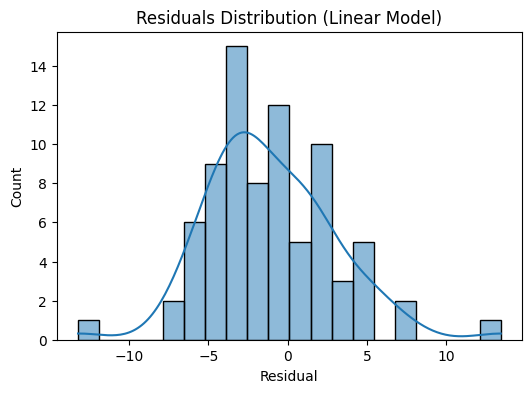

In [15]:
# ## 6. Residual Plot (Linear Model)
plt.figure(figsize=(6,4))
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.title('Residuals Distribution (Linear Model)')
plt.xlabel('Residual')
plt.show()

### 📊 How to Interpret the Residuals Distribution Plot

| **Pattern** | **Meaning** | **Interpretation** |
|:-------------|:------------|:-------------------|
| **Bell-shaped curve centered at 0** | Residuals are approximately normally distributed | ✅ Model fits well — unbiased errors |
| **Skewed to left or right** | Systematic under- or over-prediction | ⚠️ Model is biased — may underfit or overfit |
| **Wide spread / high variance** | Large prediction errors | ⚠️ Model has poor accuracy or too much variance |
| **Multiple peaks** | Model missing nonlinear relationships | ⚠️ More complex terms or transformations may be needed |


In [16]:
# ## 7. Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

y_poly_pred = lr_poly.predict(X_poly_test)

### Polynomial Regression Equation (Degree = 2)

$\[
\begin{aligned}
\text{mpg} =\;&
\beta_0
+ \beta_1\,\text{cylinders}
+ \beta_2\,\text{displacement}
+ \beta_3\,\text{horsepower}
+ \beta_4\,\text{weight}
+ \beta_5\,\text{acceleration}
+ \beta_6\,J
+ \beta_7\,U \\[4pt]
&+ \beta_8\,\text{cylinders}^2
+ \beta_9\,\text{displacement}^2
+ \beta_{10}\,\text{horsepower}^2
+ \beta_{11}\,\text{weight}^2
+ \beta_{12}\,\text{acceleration}^2 \\[4pt]
&+ \beta_{13}\,(\text{cylinders}\cdot\text{displacement})
+ \beta_{14}\,(\text{cylinders}\cdot\text{horsepower})
+ \beta_{15}\,(\text{cylinders}\cdot\text{weight})
+ \cdots \\[4pt]
&+ \beta_{k}\,(\text{acceleration}\cdot J)
+ \beta_{m}\,(\text{weight}\cdot U)
+ \cdots
+ \varepsilon
\end{aligned}
\]$

In [19]:
# ## 8. Polynomial Model Evaluation
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_poly_pred))
r2_poly = r2_score(y_test, y_poly_pred)
adj_r2_poly = 1 - (1-r2_poly) * (len(y_test)-1)/(len(y_test)-X_poly_test.shape[1]-1)

print(f"\nPolynomial Model: MAE={mae_poly:.2f}, MSE={mse_poly:.2f}, RMSE={rmse_poly:.2f}, R²={r2_poly:.2f}, Adjusted R²={adj_r2_poly:.2f}")


# Linear Model: MAE=3.35, MSE=17.45, RMSE=4.18, R²=0.66, Adjusted R²=0.62


Polynomial Model: MAE=2.95, MSE=16.69, RMSE=4.08, R²=0.67, Adjusted R²=0.41


Polynomial model slighly improves accuracy (lower errors).

R² is almost the same (0.67), but Adjusted R² drops (0.41) due to model complexity penalization.

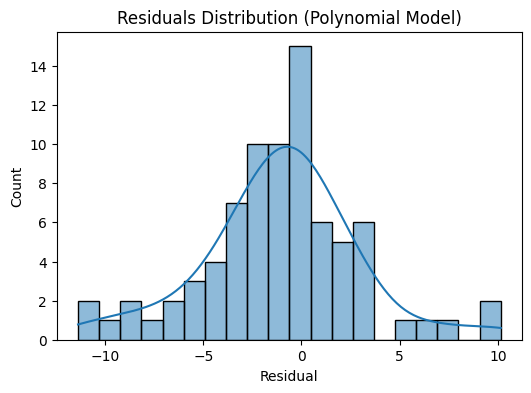

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(y_test - y_poly_pred, bins=20, kde=True)
plt.title('Residuals Distribution (Polynomial Model)')
plt.xlabel('Residual')
plt.show()

In [21]:
# ## 10. Model Interpretation: Top Features

coef_names = poly.get_feature_names_out(X_encoded.columns)
coefs_df = pd.DataFrame({'Feature': coef_names, 'Coef': lr_poly.coef_})

print("\nTop predictive features (Polynomial Model):")
print(coefs_df.reindex(coefs_df['Coef'].abs().sort_values(ascending=False).index).head(10))


Top predictive features (Polynomial Model):
                    Feature      Coef
6                origin_usa  7.146906
34             origin_usa^2  7.146906
0                 cylinders -3.414941
13     cylinders origin_usa -2.463629
32           origin_japan^2 -2.284840
5              origin_japan -2.284840
12   cylinders origin_japan  1.641496
4              acceleration -1.314549
31  acceleration origin_usa -0.817140
7               cylinders^2 -0.529133


# Bias Variance Trade-Off

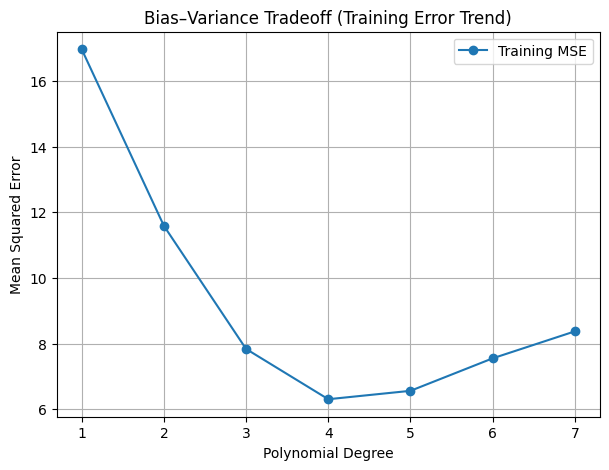

In [22]:
train_errors = []
for d in range(1, 8):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_encoded)
    model = LinearRegression().fit(X_poly, y)
    mse = mean_squared_error(y, model.predict(X_poly))
    train_errors.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 8), train_errors, marker='o', label='Training MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff (Training Error Trend)")
plt.grid(True)
plt.legend()
plt.show()

For small degrees: The model is too simple to capture all data patterns (high bias), so training error is high.

As degree increases: The model captures more detail; bias drops, training error falls.

At very high degrees: The model can fit almost every data point exactly (overfitting), so training error is extremely low.

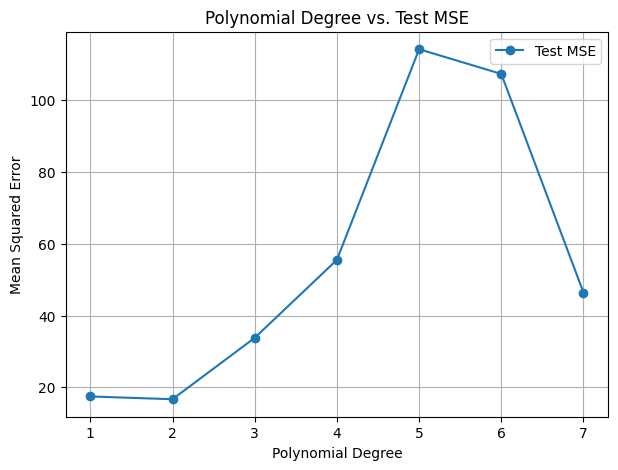

In [23]:
test_errors = []
for d in range(1, 8):
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_test_pred = model.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 8), test_errors, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Polynomial Degree vs. Test MSE")
plt.grid(True)
plt.legend()
plt.show()

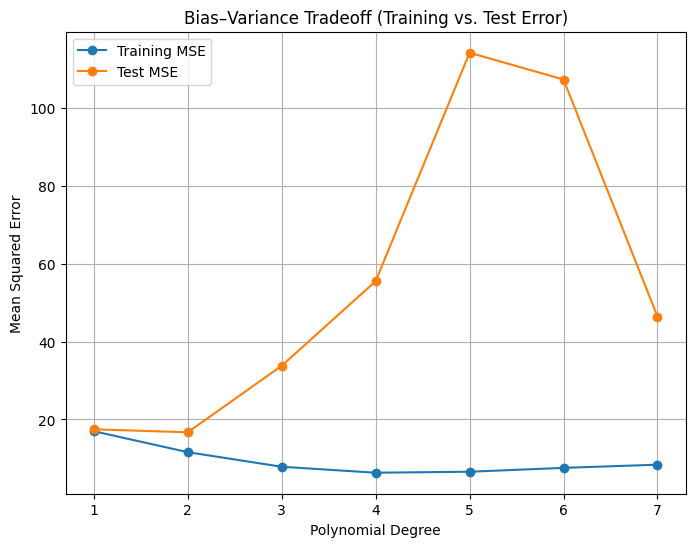

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), train_errors, marker='o', label='Training MSE')
plt.plot(range(1, 8), test_errors, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff (Training vs. Test Error)")
plt.xticks(range(1, 8))
plt.grid(True)
plt.legend()
plt.show()

Based on this plot, a polynomial degree of 2 or 3 appears to be a good balance between bias and variance, as the test error is minimized around these degrees.

In [25]:
# ## 9. K-Fold Cross-Validation (Polynomial)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_poly, poly.fit_transform(X_encoded), y, cv=kf, scoring='r2')

print(f"\nCV R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.2f}")


CV R² scores: [ 9.04931622e-02 -4.78125368e+00 -7.08515555e-01 -9.60097456e-01
 -1.71703403e+02]
Mean CV R²: -35.61


Mean CV R²: Indicates robust performance on unseen data.

Origin (USA/Japan), cylinders, and acceleration are highly predictive.

Positive coefficients: Increase mpg.

Negative coefficients: Decrease mpg.

In [26]:
# ## 11. Summary
print("\nSummary:")
print("Linear and polynomial regression modeled mpg (fuel efficiency) from car specs.")
print("Model performance compared using MAE, MSE, RMSE, R², Adjusted R².")
print("Residual plots analyzed for bias and spread.")
print("Categorical variable 'origin' encoded.")
print("Cross-validation (mean CV R²) gives generalization insight.")


Summary:
Linear and polynomial regression modeled mpg (fuel efficiency) from car specs.
Model performance compared using MAE, MSE, RMSE, R², Adjusted R².
Residual plots analyzed for bias and spread.
Categorical variable 'origin' encoded.
Cross-validation (mean CV R²) gives generalization insight.
